# **Adult Income Classification**

Dataset: https://www.kaggle.com/wenruliu/adult-income-dataset

In [ ]:
# Import Dataset from Google Drive
from google.colab import drive
drive.mount('/content/drive')

train_path = r'drive/My Drive/Dataset/Adult Income/adult.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read Dataset
import pandas as pd

data_train = pd.read_csv(train_path)

# If you don't use google drive import
# data_train = pd.read_csv('adult.csv') 

# Print first 10 rows
data_train.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [ ]:
# Dataset Summary
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
# Data Statistics
data_train.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# Visualization

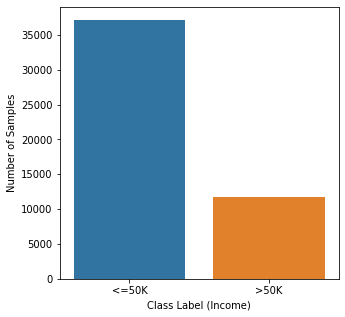

In [ ]:
# Checking Number of Samples
import matplotlib.pyplot as plt              
import seaborn as sns

fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x='income', data=data_train)
plt.xlabel("Class Label (Income)")
plt.ylabel("Number of Samples")
plt.show()

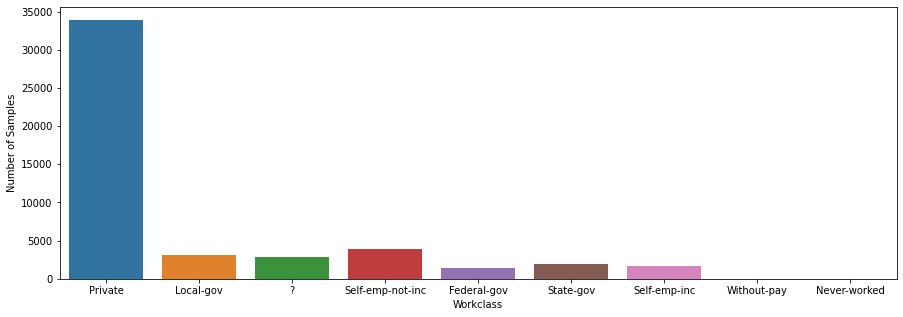

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x='workclass', data=data_train)
plt.xlabel("Workclass")
plt.ylabel("Number of Samples")
plt.show()

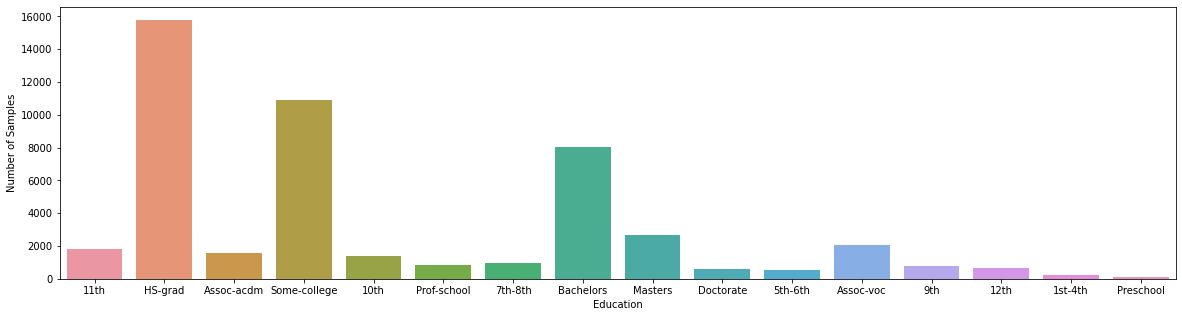

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(x='education', data=data_train)
plt.xlabel("Education")
plt.ylabel("Number of Samples")
plt.show()

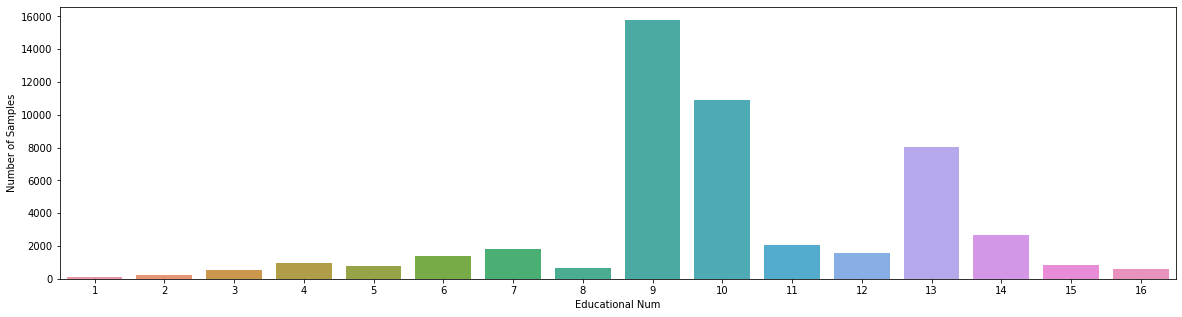

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(x='educational-num', data=data_train)
plt.xlabel("Educational Num")
plt.ylabel("Number of Samples")
plt.show()

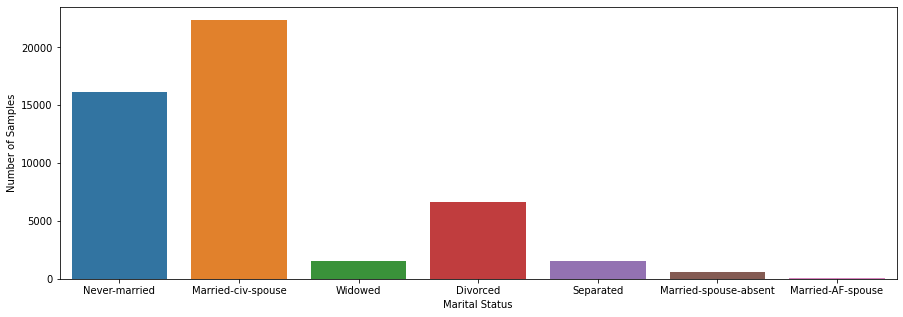

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x='marital-status', data=data_train)
plt.xlabel("Marital Status")
plt.ylabel("Number of Samples")
plt.show()

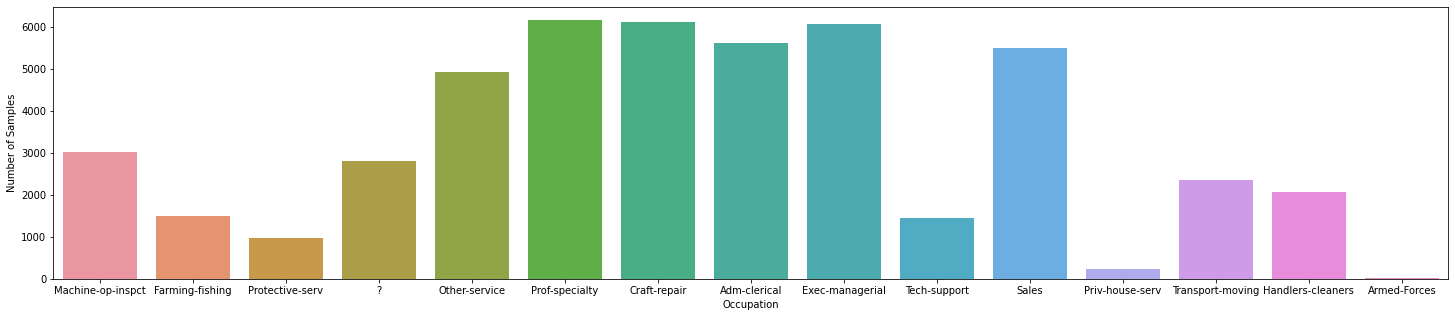

In [ ]:
fig, ax = plt.subplots(figsize=(25, 5))
sns.countplot(x='occupation', data=data_train)
plt.xlabel("Occupation")
plt.ylabel("Number of Samples")
plt.show()

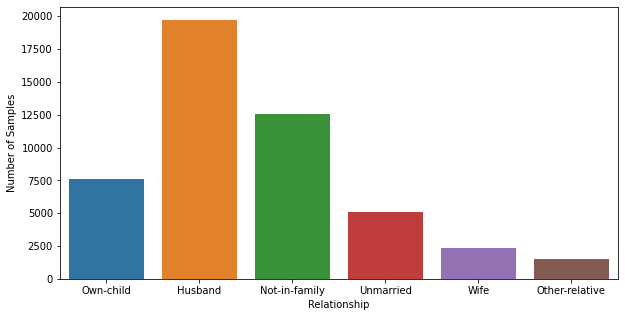

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='relationship', data=data_train)
plt.xlabel("Relationship")
plt.ylabel("Number of Samples")
plt.show()

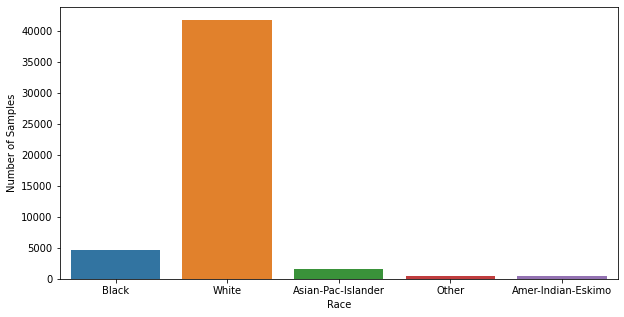

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='race', data=data_train)
plt.xlabel("Race")
plt.ylabel("Number of Samples")
plt.show()

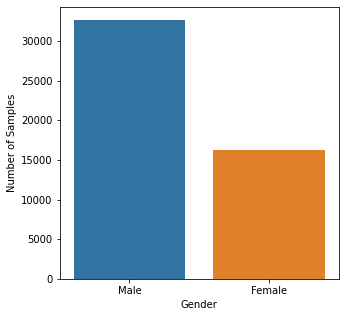

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x='gender', data=data_train)
plt.xlabel("Gender")
plt.ylabel("Number of Samples")
plt.show()

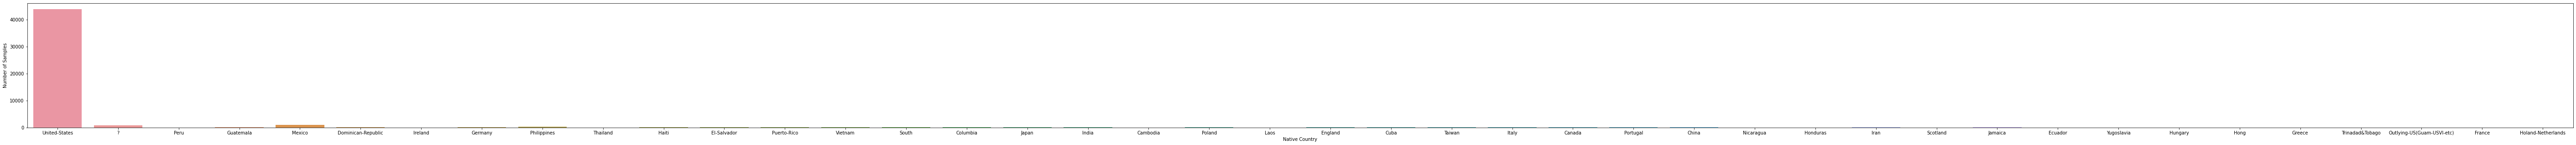

In [ ]:
fig, ax = plt.subplots(figsize=(100, 5))
sns.countplot(x='native-country', data=data_train)
plt.xlabel("Native Country")
plt.ylabel("Number of Samples")
plt.show()

# Pre - processing

In [ ]:
# Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
data_train_encoded = oe.fit_transform(data_train.select_dtypes(object))
data_train_encoded = pd.DataFrame(data=data_train_encoded, columns=data_train.select_dtypes(object).columns)

data_train = pd.concat([data_train.select_dtypes(int), data_train_encoded], axis=1)
data_train = data_train.astype(int)

data_train

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,25,226802,7,0,0,40,4,1,4,7,3,2,1,39,0
1,38,89814,9,0,0,50,4,11,2,5,0,4,1,39,0
2,28,336951,12,0,0,40,2,7,2,11,0,4,1,39,1
3,44,160323,10,7688,0,40,4,15,2,7,0,2,1,39,1
4,18,103497,10,0,0,30,0,15,4,0,3,4,0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,4,7,2,13,5,4,0,39,0
48838,40,154374,9,0,0,40,4,11,2,7,0,4,1,39,1
48839,58,151910,9,0,0,40,4,11,6,1,4,4,0,39,0
48840,22,201490,9,0,0,20,4,11,4,1,3,4,1,39,0


In [ ]:
# Checking Missing Values
data_train.isna().sum()

age                0
fnlwgt             0
educational-num    0
capital-gain       0
capital-loss       0
hours-per-week     0
workclass          0
education          0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
native-country     0
income             0
dtype: int64

In [ ]:
# Check Duplicate Values
data_train = data_train.drop_duplicates()
dup_check = data_train.duplicated().any()

data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              48790 non-null  int64
 1   fnlwgt           48790 non-null  int64
 2   educational-num  48790 non-null  int64
 3   capital-gain     48790 non-null  int64
 4   capital-loss     48790 non-null  int64
 5   hours-per-week   48790 non-null  int64
 6   workclass        48790 non-null  int64
 7   education        48790 non-null  int64
 8   marital-status   48790 non-null  int64
 9   occupation       48790 non-null  int64
 10  relationship     48790 non-null  int64
 11  race             48790 non-null  int64
 12  gender           48790 non-null  int64
 13  native-country   48790 non-null  int64
 14  income           48790 non-null  int64
dtypes: int64(15)
memory usage: 6.0 MB


In [ ]:
# Data Statistics - After Encoded
data_train.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886,3.870568,10.287989,2.618077,6.578623,1.443472,3.667903,0.668457,36.751138,0.239414
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729,1.464548,3.874617,1.507877,4.230953,1.602571,0.846133,0.470773,7.774674,0.426730
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000,4.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,39.000000,0.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000,4.000000,11.000000,2.000000,7.000000,1.000000,4.000000,1.000000,39.000000,0.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000,4.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,39.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,8.000000,15.000000,6.000000,14.000000,5.000000,4.000000,1.000000,41.000000,1.000000


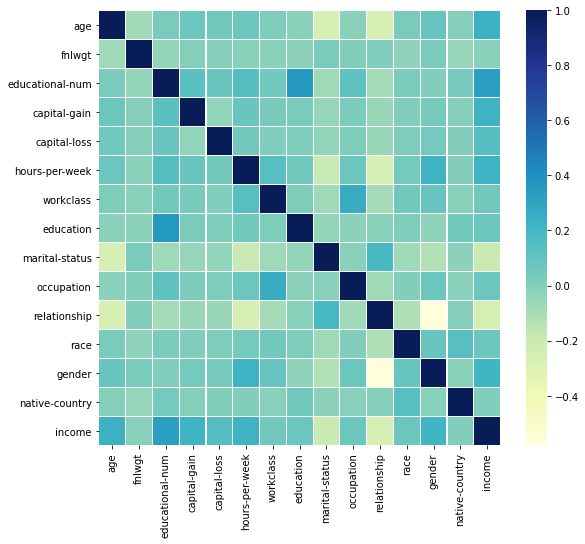

In [ ]:
# Check Correlation
corr_mat = data_train.corr()

f, ax = plt.subplots(figsize=(9, 8)) 
sns.heatmap(corr_mat, ax=ax, cmap="YlGnBu", linewidths=0.1)

In [ ]:
# Absolute Correlation
corr_mat['income'] = abs(corr_mat['income'])
sorted_corr_mat = corr_mat.sort_values(by=['income'], ascending=False)
sorted_corr_mat['income']

income             1.000000
educational-num    0.332802
relationship       0.253175
age                0.230144
hours-per-week     0.227664
capital-gain       0.223047
gender             0.214639
marital-status     0.198855
capital-loss       0.147542
education          0.080118
occupation         0.076675
race               0.070970
workclass          0.052634
native-country     0.012010
fnlwgt             0.006309
Name: income, dtype: float64

In [ ]:
# Features Selection
features = ['educational-num', 'relationship', 'age', 'hours-per-week', 'capital-gain', 'gender', 'marital-status', 'capital-loss', 'income']
data_train = data_train[features]

data_train

,educational-num,relationship,age,hours-per-week,capital-gain,gender,marital-status,capital-loss,income
0,7,3,25,40,0,1,4,0,0
1,9,0,38,50,0,1,2,0,0
2,12,0,28,40,0,1,2,0,1
3,10,0,44,40,7688,1,2,0,1
4,10,3,18,30,0,0,4,0,0
...,...,...,...,...,...,...,...,...,...
48837,12,5,27,38,0,0,2,0,0
48838,9,0,40,40,0,1,2,0,1
48839,9,4,58,40,0,0,6,0,0
48840,9,3,22,20,0,1,4,0,0


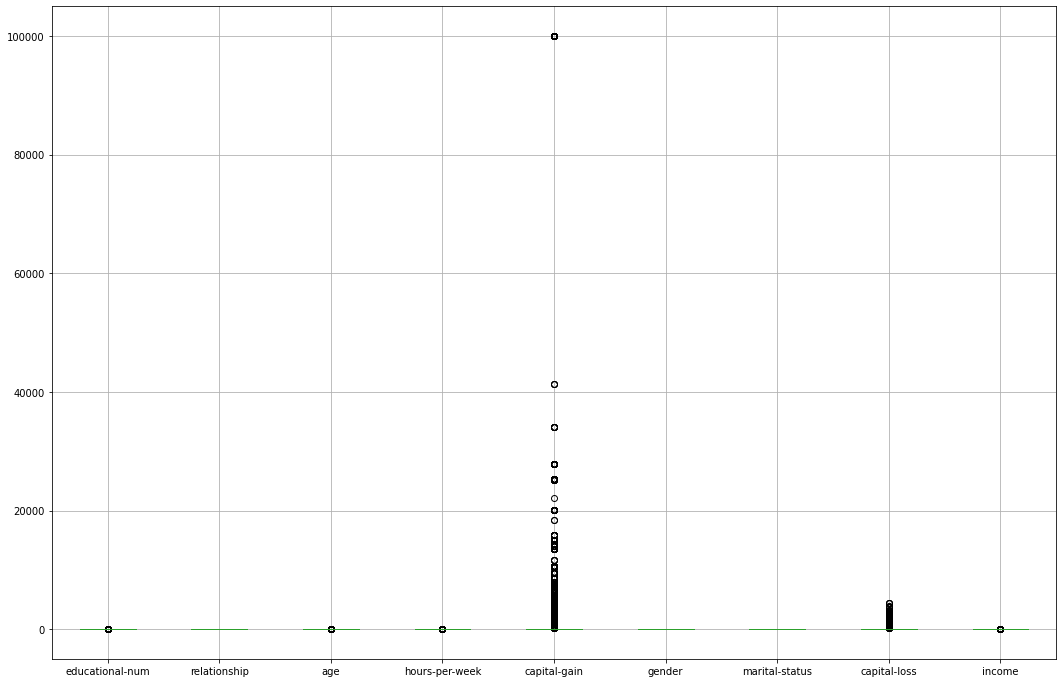

In [ ]:
# Check Outliers
f, ax = plt.subplots(figsize=(18, 12)) 
data_train.boxplot()

In [ ]:
# Import train_test_split function
import numpy as np
from sklearn.model_selection import train_test_split

y = np.array(data_train.pop('income'))
X = np.array(data_train)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% test

In [ ]:
# Metric Evaluation
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

def get_metrics(true_labels, predicted_labels):
    acc = np.round(accuracy_score(true_labels, predicted_labels), 4)
    prec = np.round(precision_score(true_labels, predicted_labels, average='weighted'), 4)
    recall = np.round(recall_score(true_labels, predicted_labels, average='weighted'), 4)
    f1 = np.round(f1_score(true_labels, predicted_labels, average='weighted'), 4)
    return [acc, prec, recall, f1]

final_score_headers = ['Model','Acc','Precision','Recall','F1']
final_score = pd.DataFrame(columns=final_score_headers)

# Classification

In [ ]:
# KNN Classification
from sklearn.neighbors import KNeighborsClassifier 

acc_KNN = []
max_acc = 0
final_rows = []
x_axis_KNN = range(5, 31)
for i in x_axis_KNN:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    if accuracy > max_acc:
        final_rows = ['KNN'] + get_metrics(y_test, y_pred)
        max_acc = accuracy
    acc_KNN.append(accuracy)
    print ("Accuracy for KNN for n neighbors = ", i, " is: ", accuracy)

print ("Highest accuracy for KNN is: ", max(acc_KNN))
final_score = pd.concat([final_score, pd.DataFrame([final_rows], columns=final_score_headers)])

Accuracy for KNN for n neighbors =  5  is:  84.40254150440664
Accuracy for KNN for n neighbors =  6  is:  84.71681355469018
Accuracy for KNN for n neighbors =  7  is:  84.64166154266584
Accuracy for KNN for n neighbors =  8  is:  84.73730955796952
Accuracy for KNN for n neighbors =  9  is:  84.79879756780761
Accuracy for KNN for n neighbors =  10  is:  84.96959759513561
Accuracy for KNN for n neighbors =  11  is:  84.79879756780761
Accuracy for KNN for n neighbors =  12  is:  84.89444558311129
Accuracy for KNN for n neighbors =  13  is:  85.0994056159049
Accuracy for KNN for n neighbors =  14  is:  84.99009359841497
Accuracy for KNN for n neighbors =  15  is:  84.98326159732186
Accuracy for KNN for n neighbors =  16  is:  85.04474960715994
Accuracy for KNN for n neighbors =  17  is:  85.0310856049737
Accuracy for KNN for n neighbors =  18  is:  85.11990161918426
Accuracy for KNN for n neighbors =  19  is:  85.17455762792922
Accuracy for KNN for n neighbors =  20  is:  85.21554963448794

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

acc = []
max_acc = 0
final_rows = []
x_axis_DT = range(3, 21)
for i in x_axis_DT:
    DT = DecisionTreeClassifier(criterion="gini",
                                random_state=40,
                                max_depth=i, 
                                min_samples_leaf=5)
    DT.fit(X_train, y_train)
    y_pred = DT.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    if accuracy > max_acc:
        final_rows = ['DT'] + get_metrics(y_test, y_pred)
        max_acc = accuracy
    acc.append(accuracy)
    print ("Accuracy for Decision Tree for max depth = ", i, " is: ", accuracy)

print ("Highest accuracy for Decision Tree is: ", max(acc))
final_score = pd.concat([final_score, pd.DataFrame([final_rows], columns=final_score_headers)])

Accuracy for Decision Tree for max depth =  3  is:  83.73300539728086
Accuracy for Decision Tree for max depth =  4  is:  84.22490947598553
Accuracy for Decision Tree for max depth =  5  is:  85.0652456104393
Accuracy for Decision Tree for max depth =  6  is:  85.20871763339483
Accuracy for Decision Tree for max depth =  7  is:  85.51615768258523
Accuracy for Decision Tree for max depth =  8  is:  85.37951766072283
Accuracy for Decision Tree for max depth =  9  is:  85.6459657033545
Accuracy for Decision Tree for max depth =  10  is:  85.6049736967958
Accuracy for Decision Tree for max depth =  11  is:  85.38634966181594
Accuracy for Decision Tree for max depth =  12  is:  85.46150167384027
Accuracy for Decision Tree for max depth =  13  is:  85.37951766072283
Accuracy for Decision Tree for max depth =  14  is:  85.1677256268361
Accuracy for Decision Tree for max depth =  15  is:  85.07890961262554
Accuracy for Decision Tree for max depth =  16  is:  85.0652456104393
Accuracy for Decis

In [ ]:
# XGBoost Classification
from xgboost import XGBClassifier

acc_XGB = []
max_acc = 0
final_rows = []
k_axis_XGB = range(15, 26)
x_axis_XGB = range(15, 26)
for k in k_axis_XGB:
    for i in x_axis_XGB:
        xgb = XGBClassifier(n_estimators=k, max_depth=i)
        xgb.fit(X_train, y_train)
        y_pred = xgb.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred) * 100
        if accuracy > max_acc:
            final_rows = ['XGB'] + get_metrics(y_test, y_pred)
            max_acc = accuracy
        acc_XGB.append(accuracy)
        print ("Accuracy for XGB for n estimators = ", k, ", max depth = ", i, " is: ", accuracy)

print ("Highest accuracy for XGB is: ", max(acc_XGB))
final_score = pd.concat([final_score, pd.DataFrame([final_rows], columns=final_score_headers)])

Accuracy for XGB for n estimators =  15 , max depth =  15  is:  85.5366536858646
Accuracy for XGB for n estimators =  15 , max depth =  16  is:  85.59814169570267
Accuracy for XGB for n estimators =  15 , max depth =  17  is:  85.54348568695771
Accuracy for XGB for n estimators =  15 , max depth =  18  is:  85.502493680399
Accuracy for XGB for n estimators =  15 , max depth =  19  is:  85.37268565962971
Accuracy for XGB for n estimators =  15 , max depth =  20  is:  85.29070164651228
Accuracy for XGB for n estimators =  15 , max depth =  21  is:  85.3043656486985
Accuracy for XGB for n estimators =  15 , max depth =  22  is:  85.26337364213978
Accuracy for XGB for n estimators =  15 , max depth =  23  is:  85.2702056432329
Accuracy for XGB for n estimators =  15 , max depth =  24  is:  85.20871763339483
Accuracy for XGB for n estimators =  15 , max depth =  25  is:  85.17455762792922
Accuracy for XGB for n estimators =  16 , max depth =  15  is:  85.5366536858646
Accuracy for XGB for n

In [ ]:
# SVM Classification
from sklearn import svm

acc_SVM = []
max_acc = 0
final_rows = []
x_axis_SVM = [0.1, 1, 10]
k = ['poly', 'rbf', 'sigmoid']
for k in k:
    for i in x_axis_SVM:
        SVM = svm.SVC(C=i, gamma='scale', kernel=k)
        SVM.fit(X_train, y_train)
        y_pred = SVM.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred) * 100
        if accuracy > max_acc:
            final_rows = ['SVM'] + get_metrics(y_test, y_pred)
            max_acc = accuracy
        acc_SVM.append(accuracy)
        print ("Accuracy for SVM for kernel = ", k, " c = ", i, " is: ", accuracy)

print ("Highest accuracy for SVM is: ", max(acc_SVM))
final_score = pd.concat([final_score, pd.DataFrame([final_rows], columns=final_score_headers)])

Accuracy for SVM for kernel =  poly  c =  0.1  is:  79.76361276217804
Accuracy for SVM for kernel =  poly  c =  1  is:  79.75678076108493
Accuracy for SVM for kernel =  poly  c =  10  is:  79.82510077201613
Accuracy for SVM for kernel =  rbf  c =  0.1  is:  80.74058891849423
Accuracy for SVM for kernel =  rbf  c =  1  is:  79.92074878731981
Accuracy for SVM for kernel =  rbf  c =  10  is:  81.08902097424335
Accuracy for SVM for kernel =  sigmoid  c =  0.1  is:  75.98551615768258
Accuracy for SVM for kernel =  sigmoid  c =  1  is:  76.01284416205507
Accuracy for SVM for kernel =  sigmoid  c =  10  is:  76.01284416205507
Highest accuracy for SVM is:  81.08902097424335


In [ ]:
# MLP Classification
from sklearn.neural_network import MLPClassifier

acc_MLP = []
max_acc = 0
final_rows = []
x_axis_MLP = ['identity', 'logistic', 'tanh', 'relu']
for i in x_axis_MLP:
    MLP = MLPClassifier(activation=i, random_state=0, max_iter=2000)
    MLP.fit(X_train, y_train)
    y_pred = MLP.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    if accuracy > max_acc:
        final_rows = ['MLP'] + get_metrics(y_test, y_pred)
        max_acc = accuracy
    acc_MLP.append(accuracy)
    print ("Accuracy for MLP for activation = ",i ," is: ", accuracy)

print ("Highest accuracy for MLP is: ", max(acc_MLP))
final_score = pd.concat([final_score, pd.DataFrame([final_rows], columns=final_score_headers)])

Accuracy for MLP for activation =  identity  is:  78.568012570882
Accuracy for MLP for activation =  logistic  is:  82.98831727813076
Accuracy for MLP for activation =  tanh  is:  83.07713329234133
Accuracy for MLP for activation =  relu  is:  81.75172508027602
Highest accuracy for MLP is:  83.07713329234133


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

acc_RF = []
max_acc = 0
final_rows = []
x_axis_RF = range(21, 41)
for i in x_axis_RF:
    RF = RandomForestClassifier(n_estimators = i, random_state = 0)
    RF.fit(X_train, y_train)
    y_pred = RF.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    if accuracy > max_acc:
        final_rows = ['RF'] + get_metrics(y_test, y_pred)
        max_acc = accuracy
    acc_RF.append(accuracy)
    print ("Accuracy for Random Forest for estimator = ",i ," is: ", accuracy) 

print ("Highest accuracy for Random Forest is: ", max(acc_RF))
final_score = pd.concat([final_score, pd.DataFrame([final_rows], columns=final_score_headers)])

Accuracy for Random Forest for estimator =  21  is:  84.15658946505431
Accuracy for Random Forest for estimator =  22  is:  84.12926146068183
Accuracy for Random Forest for estimator =  23  is:  84.19758147161303
Accuracy for Random Forest for estimator =  24  is:  84.25906948145112
Accuracy for Random Forest for estimator =  25  is:  84.3205574912892
Accuracy for Random Forest for estimator =  26  is:  84.27273348363735
Accuracy for Random Forest for estimator =  27  is:  84.27273348363735
Accuracy for Random Forest for estimator =  28  is:  84.38887750222041
Accuracy for Random Forest for estimator =  29  is:  84.30006148800983
Accuracy for Random Forest for estimator =  30  is:  84.29322948691672
Accuracy for Random Forest for estimator =  31  is:  84.38204550112728
Accuracy for Random Forest for estimator =  32  is:  84.40254150440664
Accuracy for Random Forest for estimator =  33  is:  84.42986950877912
Accuracy for Random Forest for estimator =  34  is:  84.46402951424471
Accurac

In [ ]:
# Final Score
final_score = final_score.sort_values(by=['Acc'], ascending=False)
final_score.index = np.arange(1, len(final_score)+1)

print(final_score)

  Model     Acc  Precision  Recall      F1
1   XGB  0.8573     0.8512  0.8573  0.8510
2    DT  0.8565     0.8510  0.8565  0.8465
3   KNN  0.8522     0.8453  0.8522  0.8442
4    RF  0.8449     0.8388  0.8449  0.8405
5   MLP  0.8308     0.8210  0.8308  0.8216
6   SVM  0.8109     0.8193  0.8109  0.7701
